# K-Means
k-Means:
> 优点：容易实现<br>
> 缺点：可能收敛到局部最小，在大规模数据集上收敛较慢<br>
> 适用数据类型：数值型数据

k-Means算法的一般流程：
> 1. 收集数据:使用任意方法。
> 2. 准备数据:需要数值型数据来计算距离,也可以将标称型数据映射为二值型数据再用于距离计算。
> 3. 分析数据:使用任意方法。
> 4. 训练算法:不适用于无监督学习,即无监督学习没有训练过程。
> 5. 测试算法:应用聚类算法、观察结果。可以使用量化的误差指标如误差平方和(后面会介绍)来评价算法的结果。
> 6. 使用算法:可以用于所希望的任何应用。通常情况下,簇质心可以代表整个簇的数据来做出决策。

## 1. 算法实现

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    """计算两个样本的距离"""
    
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

def randCent(dataSet, k):
    """
    初始化k个质心，随机质心必须在这个数据集的边界范围之内。
    可以通过找到数据集每一列的最大值和最小值
    来完成。然后生成0到1.0之间的随机数并通过最小值和取值范围来完成范围内取值。
    """
    
    n = dataSet.shape[1]
    centroids = np.mat(np.zeros((k, n)))
    for j in range(n):
        # 计算每列的最小值
        minJ = min(dataSet[:, j])
        # 计算每列的取值范围
        rangeJ = float(max(dataSet[:, j]) - minJ)
        # 在数据集范围内生成随机点
        centroids[:, j] = minJ + rangeJ * np.random.rand(k, 1)
    return centroids

In [9]:
datMat = np.mat(loadDataSet('testSet.txt'))
min(datMat[:, 0]), min(datMat[:, 1]), max(datMat[:, 1]), max(datMat[:, 0])

(matrix([[-5.379713]]),
 matrix([[-4.232586]]),
 matrix([[5.1904]]),
 matrix([[4.838138]]))

In [10]:
randCent(datMat, 2)

matrix([[ 3.96122385,  0.96452983],
        [-2.46546228,  4.82553859]])

In [11]:
distEclud(datMat[0], datMat[1])

5.184632816681332

函数测试完成，下面实现K-Means算法：

In [20]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    """
    创建k个质心，然后将每个点分配到最近的质心，再使用平均值重新计算质心。
    """
    
    m = dataSet.shape[0]
    # 初始化矩阵存储每个点的簇分配结果
    # clusterAssment第一列存储簇索引，第二列记录每个点到该质心的距离
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 初始化k个质心
    centroids = createCent(dataSet, k)
    # 初始化标志变量，用于判断迭代是否需要继续
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 第一个循环，遍历所有数据将其按距离划分到k个质心上
        for i in range(m):
            minDist = np.inf; minIndex = -1
            for j in range(k):
                # 计算第i个样本点距当前第j个质心的距离
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                if distJI < minDist:
                    # 更新最小距离和当前样本所属的质心
                    minDist = distJI
                    minIndex = j
            # 如果任一点的质心分配结果发生改变，更新标志，继续迭代
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            # 更新簇分配结果为距离最小的质心的索引和最小距离的平方
            clusterAssment[i, :] = minIndex, minDist ** 2
        # 输出当前样本的质心
        print(centroids)
        # 遍历所有的质心并更新他们的取值
        for cent in range(k):
            # 通过数组过滤来获得给定簇的所有点
            ptsInClust = dataSet[np.nonzero(clusterAssment[:, 0].A == cent)[0]]
            # 计算所有点的均值，更新质心取值
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
    # 返回所有k个质心和所有样本点的类别
    return centroids, clusterAssment

In [22]:
datMat = np.mat(loadDataSet('testSet.txt'))
myCentroids, clustAssing = kMeans(datMat, 4)

[[-4.29385173  2.02861099]
 [ 3.82716744 -3.08232432]
 [-3.07505371 -2.17937282]
 [-0.08105798  1.74220275]]
[[-3.00984169  2.66771831]
 [ 2.97753205 -2.6512067 ]
 [-3.38237045 -2.9473363 ]
 [ 1.44206122  3.02350437]]
[[-2.54951105  2.75812458]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.46383071  3.1198451 ]]
[[-2.46154315  2.78737555]
 [ 2.80293085 -2.7315146 ]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


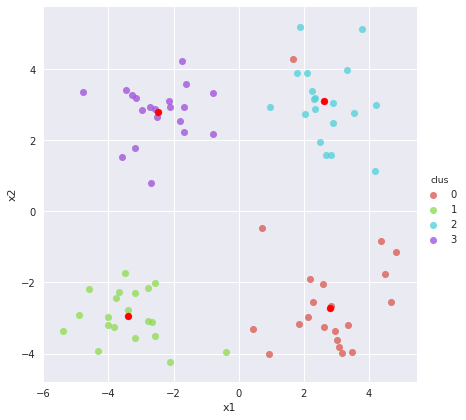

In [100]:
pltdf = pd.DataFrame(datMat)
label = list(np.array(clustAssing[:, 0]).ravel().astype(int))
label.insert(0, 0)
labeldf = pd.DataFrame(label)
pltdata = pd.merge(pltdf, labeldf, left_index=True, right_index=True)
pltdata.columns=['x1', 'x2', 'clus']
sns.set(context='notebook', style='darkgrid', palette=sns.color_palette('hls', 4))

sns.lmplot('x1', 'x2', data=pltdata,
           hue='clus', 
           size=6, fit_reg=False, scatter_kws={"s": 50})
plt.scatter(np.array(myCentroids[:, 0]), np.array(myCentroids[:, 1]), c='r')
plt.show()

## 2. 二分k-Means算法
为克服K-均值算法收敛于局部最小值的问题,有人提出了另一个称为二分K-均值(bisecting K-means)的算法。该算法首先将所有点作为一个簇,然后将该簇一分为二。之后选择其中一个簇继续进行划分,选择哪一个簇进行划分取决于对其划分是否可以最大程度降低SSE的值。上述基于SSE的划分过程不断重复,直到得到用户指定的簇数目为止。

In [ ]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = dataSet.shape[0]